Logistic regression



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction
In comparison to linear regression, logistic regression is used when the data is categorical (e.g. binary valued, $y \in \left\{0, 1\right\}$). We use this method primarily for classification problems in machine learning. The lab investigates `Logistic Regression` prediction and explanation.

**By the end of this lab you will be able to:**
- You'll learn how to apply `Logistic Regression` model both with `statsmodel` and `sklearn` in Python.
- You'll learn how to interpret the results and compare models using a real world dataset.

# Application

_Churn Rate_ is a business term that describes the rate of which customers leave or stop paying for a product or service during a certain time frame. Since obtaining new customers is much more costly than retaining existing ones (5-20 times more expensive), this rate is worth being considered in the strategic decisions of companies. Predicting churn is important for businesses with subscription models such as _cell phone, cable, or merchant credit card processing plans_.

The lab will predict the customer churn that uses binary values for customer decision as the target variable in a telecom company. A **False** label indicates that the customer continues working with company and a **True** label indicates that the customer stops working with the company.



## Import libraries and data
Import `numpy`, `pandas`, `seaborn`, `ast`, `json` and `matplotlib.pyplot`

In [3]:
#Importing the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix


## Data Set
Telecom's dataset will be analyzed for churn modelling. Please load `customer.csv`data set.

In [4]:
#Write the code here
#-------------------------------------------------
customer = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/customer.csv')

customer.head()
#-------------------------------------------------

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


The table below contains the data dictionary.

|Feature         |Definition                   |
|:--------------:|:----------------------------|
|State           |State                        |
|Account Length  |Account length               |    
|Area Code       |Area code                    |
|Phone           |Phone number                 |             
|Int'l Plan      |International plan           |
|VMail Plan      |Voice mail plan              |
|VMail Message   |Number vmail messages        |
|Day Mins        |Total day minutes            |
|Day Calls       |Total day calls              |
|Day Charge      |Total day charge             |
|Eve Mins        |Total eve minutes            |
|Eve Calls       |Total eve calls              |
|Eve Charge      |Total eve charge             |
|Night Mins      |Total night minutes          |
|Night Calls     |Total night calls            |
|Night Charge    |Total night charge           |
|Intl Mins       |Total international minutes  |
|Intl Calls      |Total international calls    |
|Intl Charge     |Total international charge   |
|CustServ Calls  |Customer service calls       |
|Churn           |False,True (binary)          |


We will first conduct some exploratory analysis to familiarize ourselves with the data. Try to answer the following questions

## Data Discovery
> How many individuals participated in the study by checking the shape of the dataframe?  


In [5]:
# Write the code here
#--------------------------------------------------------------------
customer.shape
#--------------------------------------------------------------------

(3333, 21)

>  Check the datatypes and missing values.

In [6]:
# Write the code here
#--------------------------------------------------------------------
customer.dtypes
#--------------------------------------------------------------------

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn              object
dtype: object

In [7]:
customer.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

> Find the breakdown of datatypes by using `df.dtypes.value_counts()`.

In [9]:
#Write the code here
#--------------------------------------------------------------------
customer.dtypes.value_counts()

#--------------------------------------------------------------------

int64      8
float64    8
object     5
Name: count, dtype: int64

> Check the statistics in the dataset.

In [10]:
#Write the code here
#--------------------------------------------------------------------
customer.describe()
#--------------------------------------------------------------------

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


> Check the statistics for categorical variables by using [df.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [11]:
#Write the code here
#--------------------------------------------------------------------
customer.describe(include=['object'])
#--------------------------------------------------------------------

,State,Phone,Int'l Plan,VMail Plan,Churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False.
freq,106,1,3010,2411,2850


> How many "True" and "False" (for the Churn column) are included in the dataframe? (You can use `.value_counts()`)

In [12]:
#Write the code here
#--------------------------------------------------------------------
customer['Churn'].value_counts()

#--------------------------------------------------------------------

Churn
False.    2850
True.      483
Name: count, dtype: int64

> Check the mean value of each column for the classes in 'Churn' column using `groupby()` function.

In [13]:
#Write the code here
#--------------------------------------------------------------------
numeric_cols = customer.select_dtypes(include=[np.number]).columns
mean_values = customer.groupby('Churn')[numeric_cols].mean()
mean_values
#--------------------------------------------------------------------

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Churn,,,,,,,,,,,,,,,,
False.,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True.,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


Here are some graphs to visualize the dataframe.

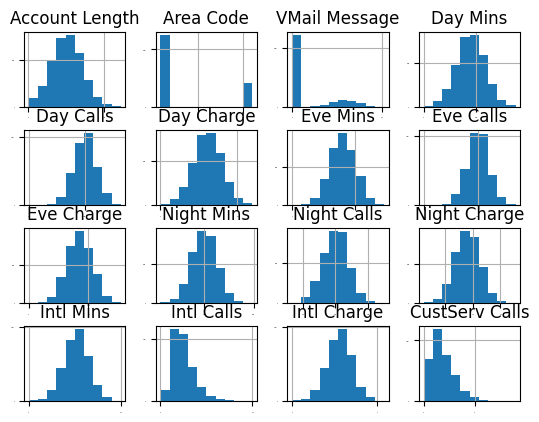

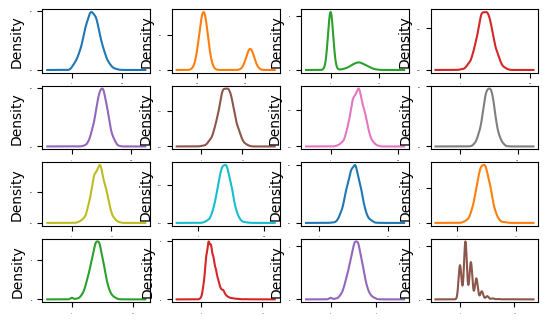

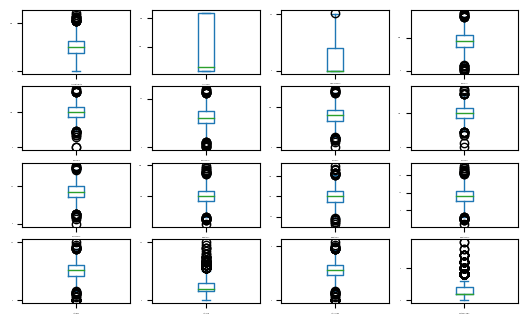

In [14]:
# Histogram
customer.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

# Density
customer.plot(kind='density', subplots=True, layout=(5,4), sharex=False,
              legend=False, fontsize=1)
plt.show()

# Boxplots
customer.plot(kind='box', subplots=True, layout=(5,4), sharex=False,
              sharey=False, fontsize=1)
plt.show()

> Transform the categorical variables by using `LabelEncoder()`.

In [15]:
#Write the code here
#---------------------------------------------------------------------------------
categorical_feat = customer.select_dtypes(include='object').columns
customer_new = customer.copy()
le = LabelEncoder()

for i in categorical_feat:
    customer_new[i] = le.fit_transform(customer_new[i])

customer_new.head()

#---------------------------------------------------------------------------------

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


> Based on your intuition and a skim of the data, which features do you think will be the most significant for predicting `Churn`?
> Create the [correlation matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) for this dataframe.

FOR NUMERICAL COLUMNS

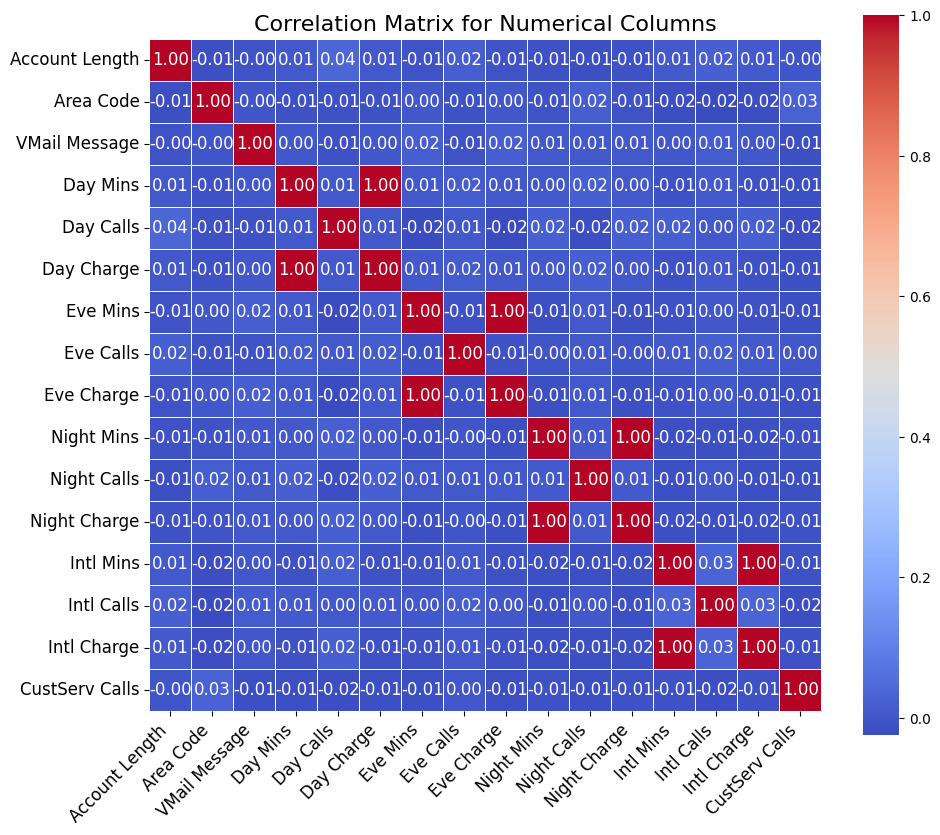

In [24]:
# Tính toán ma trận tương quan cho các cột số
numeric_cols = customer.select_dtypes(include=[np.number]).columns
correlation_matrix = customer[numeric_cols].corr()

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(14, 12))

# Vẽ heatmap với các cải tiến
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={'size': 12}, fmt='.2f', linewidths=.5)

# Thêm lề cho biểu đồ
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.3)

# Xoay nhãn của các trục và điều chỉnh khoảng cách giữa các nhãn
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Correlation Matrix for Numerical Columns', fontsize=16)
plt.show()


# Logistic Regression

We will use the `LogisticRegression()` function from scikit-learn to fit our model. You can read about how to use it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit). First, we split dataframe into sets as `train` and `test` by using [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [16]:
# Split the data into target and features
y = customer_new['Churn']                  # create y as a target variable
X = customer_new.drop(['Churn'],axis=1)    # create X as features


# Splitting the dataframe into "train set" and "test set"
XTrain, XTest, yTrain, yTest = train_test_split(X, y, stratify=y,random_state=4,test_size=0.2, shuffle=True)
print(XTrain.shape, XTest.shape, yTrain.shape, yTest.shape)

(2666, 20) (667, 20) (2666,) (667,)


### Fitting a Simple Logistic Regression Model with Selected Features

We will construct a simple model using only four  features of

1.   Mục danh sách
2.   Mục danh sách

your choosing. [Logistic Regression](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.Logit.html) without regularization is applied using the `sm.Logit` function from `statsmodels`. Once we fit the model, we can display the
coefficients and p-values.

In [25]:
# We create a new features set which includes the specified columns.
# For this practice XTrainSimple, XTestSimple, yTrainSimple, yTestSimple are defined.

#Choose your four features
#--------------------------------------------------------------------
SimpleFeatures = ['CustServ Calls', 'VMail Message', 'Day Charge', 'Eve Charge']
#--------------------------------------------------------------------

XTrainSimple = XTrain[SimpleFeatures]
yTrainSimple = yTrain

XTestSimple = XTest[SimpleFeatures]
yTestSimple = yTest


# Train the model with train set
SimpleModel = sm.Logit(yTrainSimple, sm.add_constant(XTrainSimple))
SimpleResult = SimpleModel.fit()
SimpleResult.summary()

Optimization terminated successfully.
         Current function value: 0.363933
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2661
Method:                           MLE   Df Model:                            4
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.1200
Time:                        09:52:27   Log-Likelihood:                -970.24
converged:                       True   LL-Null:                       -1102.5
Covariance Type:            nonrobust   LLR p-value:                 4.650e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.0367      0.375    -16.118      0.000      -6.771      -5.303
CustServ Calls     0.4309      0.041     10.546      0.000       0.351       0.511
VMail Message     -0.0213      0.005     -4.400      0.000      -0.031      -0.012
Day Charge         0.0713      0.007     10.567      0.000       0.058       0.085
Eve Charge         0.0749      0.014      5.319      0.000       0.047       0.102
==================================================================================
"""

Here are **intercept** and **coefficients** values by `result.params`

In [26]:
coefficients = SimpleResult.params
coefficients

const            -6.036655
CustServ Calls    0.430864
VMail Message    -0.021318
Day Charge        0.071313
Eve Charge        0.074864
dtype: float64

> Create a fake customer using the features you selected. What is their churn probability?


In [27]:

# Write the code here
#--------------------------------------------------------------------
# Selected Features = CustServ Calls: 3, VMail Message: 15 , Day Charge: 50, Eve Charge: 30
#--------------------------------------------------------------------
z = -6.036655 + 0.430864 * 3 -0.021318 * 15 + 0.071313*50 + 0.074864*30
fake_y_pred = 1/(1+np.exp(-z))
print("Their churn probability ^yi:", fake_y_pred)

#-------------------------------------------------------------------

Their churn probability ^yi: 0.6786854029926062


Here is the calculation **the error on test set** for `SimpleModel`. The `predict()` method for the Logistic regression function uses a default threshold of 0.5.

In [29]:
# Calculate the score (or mean accuracy) yourself, using the predict method.

yHatSimple = SimpleModel.predict(SimpleResult.params,sm.add_constant(XTestSimple))
manualScoreSimple = 1 - np.mean(np.abs(yHatSimple - yTestSimple))
manualScoreSimple


0.7885100356956831

### Fitting the Full Model

Now build a logistic regression model using all features. Call your new model `FullModel`.


In [30]:
# Train an unregularized logistic regression "FullModel" with full features
# Be careful of using XTrain, XTest, yTrain, yTest values

# Write the code here
#--------------------------------------------------------------------
# Train the model with train set
FullModel = sm.Logit(yTrain, sm.add_constant(XTrain))
FullResult = FullModel.fit()
FullResult.summary()
#---------------------------------------------

Optimization terminated successfully.
         Current function value: 0.327128
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2645
Method:                           MLE   Df Model:                           20
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.2090
Time:                        11:17:26   Log-Likelihood:                -872.12
converged:                       True   LL-Null:                       -1102.5
Covariance Type:            nonrobust   LLR p-value:                 4.462e-85
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.4336      1.055     -8.945      0.000     -11.501      -7.367
State              0.0032      0.004      0.757      0.449      -0.005       0.011
Account Length     0.0005      0.002      0.325      0.745      -0.003       0.004
Area Code          0.0004      0.001      0.280      0.779      -0.002       0.003
Phone            2.66e-05   6.48e-05      0.410      0.681      -0.000       0.000
Int'l Plan         2.0446      0.164     12.470      0.000       1.723       2.366
VMail Plan        -1.9563      0.618     -3.166      0.002      -3.167      -0.745
VMail Message      0.0372      0.019      1.919      0.055      -0.001       0.075
Day Mins           0.7808      3.671      0.213      0.832      -6.414       7.976
Day Calls          0.0016      0.003      0.522      0.602      -0.004       0.008
Day Charge        -4.5155     21.594     -0.209      0.834     -46.839      37.808
Eve Mins           0.5983      1.831      0.327      0.744      -2.990       4.187
Eve Calls          0.0028      0.003      0.915      0.360      -0.003       0.009
Eve Charge        -6.9509     21.541     -0.323      0.747     -49.170      35.268
Night Mins        -0.0114      0.977     -0.012      0.991      -1.926       1.903
Night Calls        0.0029      0.003      0.920      0.358      -0.003       0.009
Night Charge       0.3491     21.710      0.016      0.987     -42.202      42.900
Intl Mins         -2.1733      5.906     -0.368      0.713     -13.749       9.403
Intl Calls        -0.0793      0.028     -2.849      0.004      -0.134      -0.025
Intl Charge        8.3785     21.874      0.383      0.702     -34.494      51.251
CustServ Calls     0.5060      0.044     11.530      0.000       0.420       0.592
==================================================================================
"""

> Calculate the accuracy score of `FullModel`

In [31]:
#Write the code here
#--------------------------------------------------------------------
yHatFull = FullModel.predict(FullResult.params,sm.add_constant(XTest))
manualScoreFull = 1 - np.mean(np.abs(yHatFull - yTest))
manualScoreFull

#--------------------------------------------------------------------

0.8086143944964082

### Fitting the Full Model with Regularization

Create another data set as  `XTrainReg` and `XTestReg` out of **XTrain** dataset and `yTrainReg` and `yTestReg` out of **yTrain** dataset with full features to apply the different hyperparameters for `regularization`.

In [32]:
# Create new train and test sets out of XTrain.
# Split train data into as XTrainReg and XTestReg and yTrainReg and yTestReg

# Write the code here
# ------------------------------------------------------------------
XTrainReg, XTestReg, yTrainReg, yTestReg = train_test_split(X, y, stratify=y,random_state=4,test_size=0.2, shuffle=True)
print(XTrainReg.shape, XTestReg.shape, yTrainReg.shape, yTestReg.shape)

#--------------------------------------------------------------------

(2666, 20) (667, 20) (2666,) (667,)


Here we describe two different functions as `print_coefs` and `print_summary_stats` to have the coefficients and confusion matrix easily.

In [33]:
def print_coefs(mdl, features):
    coefs = mdl.coef_[0]
    intercept = mdl.intercept_[0]

    for feature, coef in zip(features, coefs):
        print('{:<16}{}'.format(feature, coef))
    print('intercept\t{}'.format(intercept))


In [34]:
def print_summary_stats(x, yTrue, yHat):
    score = 1 - np.mean(np.abs(yHat - yTrue))
    cMatrix = confusion_matrix(y_true = yTrue, y_pred = yHat)

    # plot and label the confusion matrix.
    plt.figure()
    plt.imshow(cMatrix, cmap=plt.cm.Blues)
    plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center')
    plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center')
    plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center')
    plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center')
    tick_marks = [0,1]
    labels = ['Stay', 'Go']
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label');
    plt.xlabel('Predicted label');

    tpr = cMatrix[1, 1] / (cMatrix[1, 1] + cMatrix[1, 0])
    fpr = cMatrix[0, 1] / (cMatrix[0, 1] + cMatrix[0, 0])
    prec = cMatrix[1, 1] / (cMatrix[1, 1] + cMatrix[0, 1])
    fomr = cMatrix[1, 0] / (cMatrix[1, 0] + cMatrix[0, 0])

    print('Recall (True Positive Rate) \t= {}'.format(tpr))
    print('False Positive Rate \t\t= {}'.format(fpr))
    print('Precision \t\t\t= {}'.format(prec))
    print('False Omission Rate \t\t= {}'.format(fomr))
    print('Score \t\t\t\t= {}'.format(score))



Try fitting a regularized model `RegLR1` with **𝑙1**  regularization and **C** value of your choice (note that C is equal to 1/lambda). Feel free to play around with multiple C values. Check [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to have more information about which _penalty_ is working with which _solver_.

_Note_: You may have to increase the max_iter parameter in `LogisticRegression()` in order to get the model to converge

State           0.002694124837097007
Account Length  0.00011460142315411588
Area Code       -0.0010473083548219065
Phone           1.5571785106911748e-05
Int'l Plan      1.9867159521904258
VMail Plan      -1.5345110686887142
VMail Message   0.024416323781730385
Day Mins        0.0073497647115912754
Day Calls       0.00011386732736991678
Day Charge      0.030702006978851944
Eve Mins        0.004420023465538251
Eve Calls       0.0013216479813538723
Eve Charge      0.02749770799211027
Night Mins      0.002761484870641565
Night Calls     0.0013060507139650579
Night Charge    0.020935358949246714
Intl Mins       0.07721773758213854
Intl Calls      -0.08087114487533044
Intl Charge     0.0
CustServ Calls  0.4894761937761516
intercept	-7.698153844805852

For the FULL-REGULARIZED RegLR1 model:
Recall (True Positive Rate) 	= 0.26804123711340205
False Positive Rate 		= 0.028070175438596492
Precision 			= 0.6190476190476191
False Omission Rate 		= 0.1136
Score 				= 0.8695652173913043


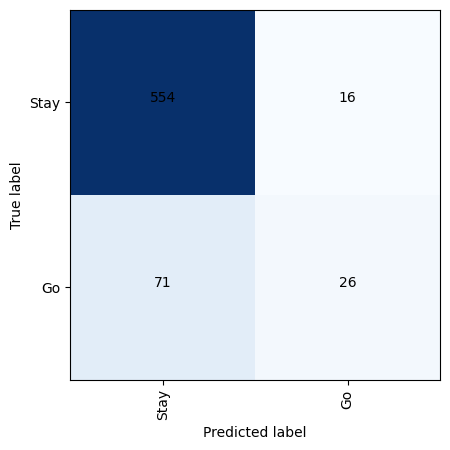

In [36]:
# Train a regularized LogReg model RegLR1

RegLR1 = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=200000)
RegLR1.fit(XTrainReg, yTrainReg)

fullFeatures = list(XTrainReg.columns)
print_coefs(RegLR1, fullFeatures)

yHatReg1 = RegLR1.predict(XTestReg)
cMatrix = confusion_matrix(y_true = yTestReg, y_pred = yHatReg1)

print('\nFor the FULL-REGULARIZED RegLR1 model:')
print_summary_stats(XTestReg, yTestReg, yHatReg1)


> Create a second-regularized model `RegLR2` with **𝑙2** regularization and a **C** value of your choice.

State           0.0017270824960638547
Account Length  -0.000567455307243297
Area Code       -0.0037693526105167852
Phone           -4.121643665980591e-06
Int'l Plan      1.8984422119277071
VMail Plan      -1.6237622738828164
VMail Message   0.027400319571518016
Day Mins        0.01317653678624259
Day Calls       -0.002456605957100983
Day Charge      -0.008937923975974421
Eve Mins        0.0059395329760627905
Eve Calls       -0.0013612796816597813
Eve Charge      -0.004650890673811138
Night Mins      0.002778058462307434
Night Calls     -0.0012602988666807265
Night Charge    -0.0002935961719809111
Intl Mins       0.053099589254486206
Intl Calls      -0.08801616849822805
Intl Charge     0.02265629178454992
CustServ Calls  0.4689067711540226
intercept	-4.690585918337587

For the FULL-REGULARIZED RegLR2 model:
Recall (True Positive Rate) 	= 0.2268041237113402
False Positive Rate 		= 0.02456140350877193
Precision 			= 0.6111111111111112
False Omission Rate 		= 0.11885895404120443
Score 				

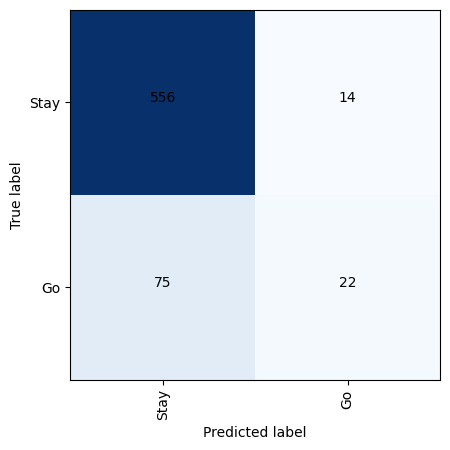

In [37]:
# Train a regularized LogReg model RegLR2

# Write the code here
# ------------------------------------------------------------------
RegLR2 = LogisticRegression(C=3, penalty='l2', solver='liblinear', max_iter=100000)
RegLR2.fit(XTrainReg, yTrainReg)

fullFeatures = list(XTrainReg.columns)
print_coefs(RegLR2, fullFeatures)

yHatReg2 = RegLR2.predict(XTestReg)
cMatrix = confusion_matrix(y_true = yTestReg, y_pred = yHatReg2)

print('\nFor the FULL-REGULARIZED RegLR2 model:')
print_summary_stats(XTestReg, yTestReg, yHatReg2)




#--------------------------------------------------------------------

> Create `RegLR3` and `RegLR4` models, one for each of **𝑙1** and **𝑙2** regularizations with vastly **different** C values than your previous model (try something crazy!).

State           0.003158762547079151
Account Length  0.00046445388122391023
Area Code       0.0001620800913758944
Phone           2.479718713170092e-05
Int'l Plan      2.038555871326717
VMail Plan      -1.9439306007790884
VMail Message   0.03673415082450415
Day Mins        0.00585265496988722
Day Calls       0.0014398575436609282
Day Charge      0.04269660732329407
Eve Mins        0.003019395258359542
Eve Calls       0.0026536810904996782
Eve Charge      0.051944025846164324
Night Mins      0.005827686901060593
Night Calls     0.0027208142568615947
Night Charge    -0.035397512150269414
Intl Mins       0.030859805131081195
Intl Calls      -0.07911617655522796
Intl Charge     0.20957404384188724
CustServ Calls  0.5052587597099218
intercept	-9.213695301648274

For the FULL-REGULARIZED RegLR3 model:
Recall (True Positive Rate) 	= 0.27835051546391754
False Positive Rate 		= 0.03333333333333333
Precision 			= 0.5869565217391305
False Omission Rate 		= 0.11272141706924316
Score 				= 0.866566

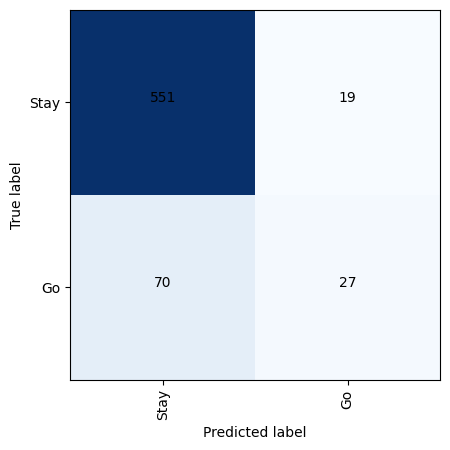

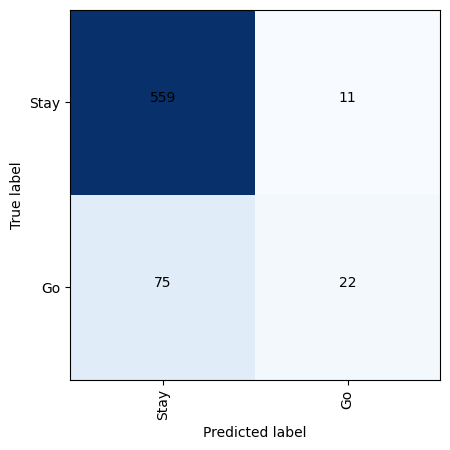

In [38]:
# Train a regularized LogReg model RegLR3
# Write the code here
# ------------------------------------------------------------------
RegLR3 = LogisticRegression(C=5000, penalty='l1', solver='liblinear', max_iter=100000)
RegLR3.fit(XTrainReg, yTrainReg)

fullFeatures = list(XTrainReg.columns)
print_coefs(RegLR3, fullFeatures)

yHatReg3 = RegLR3.predict(XTestReg)
cMatrix = confusion_matrix(y_true = yTestReg, y_pred = yHatReg3)

print('\nFor the FULL-REGULARIZED RegLR3 model:')
print_summary_stats(XTestReg, yTestReg, yHatReg3)

print('\n************************************')

#--------------------------------------------------------------------
# Train a regularized LogReg model RegLR4
# Write the code here
#--------------------------------------------------------------------
RegLR4 = LogisticRegression(C=2000, penalty='l2', solver='liblinear', max_iter=100000)
RegLR4.fit(XTrainReg, yTrainReg)

fullFeatures = list(XTrainReg.columns)
print_coefs(RegLR4, fullFeatures)

yHatReg4 = RegLR4.predict(XTestReg)
cMatrix = confusion_matrix(y_true = yTestReg, y_pred = yHatReg4)

print('\nFor the FULL-REGULARIZED RegLR4 model:')
print_summary_stats(XTestReg, yTestReg, yHatReg4)


#--------------------------------------------------------------------

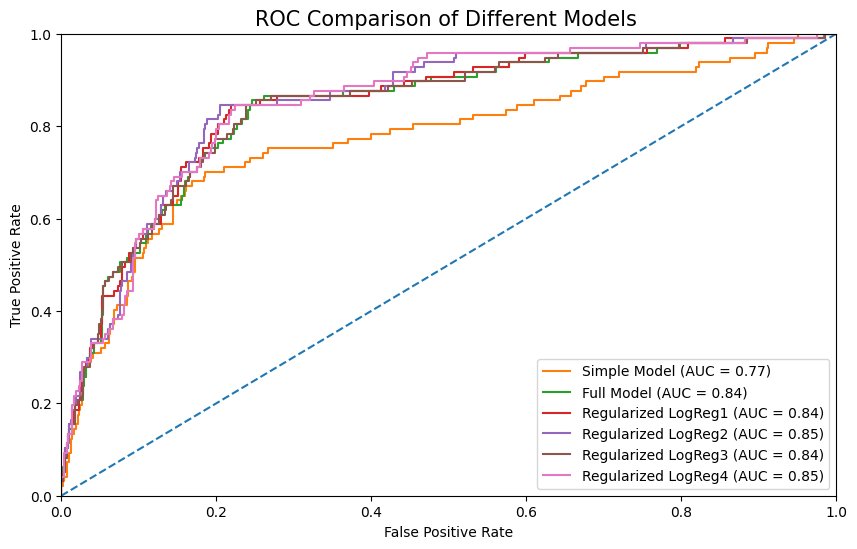

In [39]:
#In this box we will create ROC curves for all four regularized models and both non-regularized models

#-----------------Non-Regularized Models-----------------------------------
#for SimpleModel
yHatSimple = SimpleModel.predict(SimpleResult.params,sm.add_constant(XTestSimple))
fprSimple, tprSimple, threshSimple = roc_curve(yTestSimple, yHatSimple)
roc_auc_Simple= roc_auc_score(yTestSimple, yHatSimple)
roc_auc_Simple


#Write the code here for "FullModel"
#-------------------------------------------------------------------------
#for FullModel
yHatFull = SimpleModel.predict(FullResult.params,sm.add_constant(XTest))
fprFull, tprFull, threshFull = roc_curve(yTest, yHatFull)
roc_auc_Full= roc_auc_score(yTest, yHatFull)
roc_auc_Full


#-------------------------------------------------------------------------




#-------------------Regularized Models ----------------------------------
#for RegLR1
RegLR1preds = RegLR1.predict_proba(XTest).T[1]
fprRegLR1, tprRegLR1, threshRegLR1 = roc_curve(yTest, RegLR1preds)
roc_auc_RegLR1= roc_auc_score(yTest,  RegLR1preds)



#Write the code here for Regularized Models left
#-------------------------------------------------------------------------
#for RegLR2
RegLR2preds = RegLR2.predict_proba(XTest).T[1]
fprRegLR2, tprRegLR2, threshRegLR2 = roc_curve(yTest, RegLR2preds)
roc_auc_RegLR2= roc_auc_score(yTest,  RegLR2preds)


#for RegLR3
RegLR3preds = RegLR3.predict_proba(XTest).T[1]
fprRegLR3, tprRegLR3, threshRegLR3 = roc_curve(yTest, RegLR3preds)
roc_auc_RegLR3= roc_auc_score(yTest,  RegLR3preds)


#for RegLR4
RegLR4preds = RegLR4.predict_proba(XTest).T[1]
fprRegLR4, tprRegLR4, threshRegLR4 = roc_curve(yTest, RegLR4preds)
roc_auc_RegLR4= roc_auc_score(yTest,  RegLR4preds)


#-------------------------------------------------------------------------


#Plot the ROC curves
fig = plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fprSimple, tprSimple, label='Simple Model (AUC = %0.2f)' % roc_auc_Simple)
plt.plot(fprFull, tprFull, label='Full Model (AUC = %0.2f)' % roc_auc_Full)

plt.plot(fprRegLR1, tprRegLR1, label='Regularized LogReg1 (AUC = %0.2f)' % roc_auc_RegLR1)
plt.plot(fprRegLR2, tprRegLR2, label='Regularized LogReg2 (AUC = %0.2f)' % roc_auc_RegLR2)
plt.plot(fprRegLR3, tprRegLR3, label='Regularized LogReg3 (AUC = %0.2f)' % roc_auc_RegLR3)
plt.plot(fprRegLR4, tprRegLR4, label='Regularized LogReg4 (AUC = %0.2f)' % roc_auc_RegLR4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Comparison of Different Models ', fontsize = 15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

#fig.savefig('ROCcomparison.pdf', bbox_inches='tight')

> Are you suprised at the results?

> Which model do you prefer? Why?